<center>

# EE2703 - Assignment 4

## Name : ANIRUDH B S
## Roll No : EE21B019
</center>

In [1]:
import numpy
import sys
import networkx as nx
import csv

### Assumption : The above packages are installed and available
The packages needed for this assignment are numpy, sys, csv and networkx for various reasons as described later when needed.

In [2]:
g = nx.DiGraph() #Create a Directed Graph g

In [3]:
name = input("Enter the name of the net including extension (.net)")
if name[-4:] != ".net" : #Check for .net in ending
    sys.exit("Net should end with .net")
with open(name) as f:
    lines = f.readlines()

Enter the name of the net including extension (.net)c17.net


### The above box is necessary to check if the net ends with .net
This is necessary as in the instruction set provided, it is clearly mentioned that the .net files must end with a .net extension similar to the .netlist extension in Assignment 2

In [4]:
inputs = set() #Store set of inputs
ip = [] #List of inputs
outputs = {} #Dictionary of outputs 

In [5]:
for indline in lines :
    line = indline.split()
    if line[1] == 'inv' or line[1] == 'buf': #inv and buf have only one input
        i, o = line[2:]
        inputs.add(i)
        outputs[o] = line[1]
        g.add_edge(i,o)
    else: #All other gates have two inputs
        i1, i2, o = line[2:]
        inputs.add(i1)
        inputs.add(i2)
        outputs[o] = line[1]
        g.add_edge(i1,o)
        g.add_edge(i2, o)

In [6]:
for inp in inputs :
    if inp in outputs.keys() : #Check to find primary inputs of the circuit
        continue               #If one input is also an output, it is not a primary input
    else :
        ip.append(inp)         #If input is not any output then it is a primary input and we store in set inputs

In [7]:
for inp in ip :
    g.nodes[inp]["gateType"] = "PI" #Setting of gatetype PI

In [8]:
for out in outputs:
    g.nodes[out]["gateType"] = outputs[out] #Setting of gatetype - inv, nand2, and2 ...

In [9]:
try :
    n1 = list(nx.topological_sort(g))  #Try topological sort if DAG else raise exception
except :
    sys.exit("Given topology has a cycle.")

### Topological sort 
This sort helps us in determining the level of a corresponding node and thus helps in easy evaluation of the same.
Using the topological sort, we are clearly able to find out the sequence in which the outputs need to be executed.

In [10]:
for node in n1:
    g.nodes[node]['value'] = 0  #Set value of each node to be zero before computation

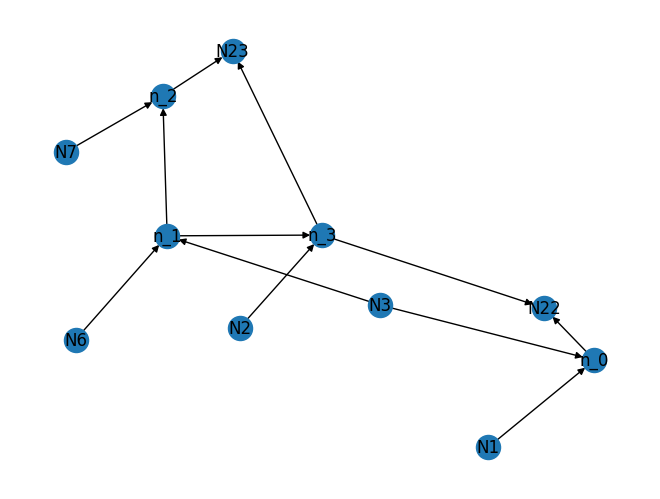

In [11]:
nx.draw(g, with_labels = True) #Draw the graph to show connectivity

In [12]:
def writetocsv(d):
    with open("output.csv", "a", newline = '') as f1:
        writer = csv.writer(f1)
        writer.writerow(d.values())

### Writing to CSV file
The above step involves writing into CSV file, the outputs computed after EDS.

### DAG Approach

In [13]:
ipname = input("Enter input file name (including .inputs) extension")
if ipname[-7:] != ".inputs" : #Check for .inputs in ending
    sys.exit("Inputs file should end with .inputs")
with open(ipname) as f:
    linesip = f.readlines()

Enter input file name (including .inputs) extensionc17.inputs


### Check for .inputs
As mentioned in the instruction, we are asked to check for .inputs extension in the .inputs file name and then proceed to take the inputs

In [14]:
l1 = linesip[0] #Get primary inputs names
l2 = linesip[1:] #Get the inputs

In [15]:
l1 = l1.split() 

In [16]:
#Checks if the input file has an input that is not a primary input, if yes, then program exists using sys.exit()
for p in l1 :
    if p in inputs :
        continue
    else :
        sys.exit("Given input is not a Primary Input")

In [17]:
def AND(a, b): #AND operation
    return a*b

In [18]:
def OR(a,b) : #OR operation
    if a+b == 0 :
        return 0
    else :
        return 1

In [19]:
def XOR(a,b) : #XOR operation
    if (a==1 and b==0) or (a==0 and b==1):
        return 1
    else :
        return 0

In [20]:
def NOT(a): #NOT operation
    if a == 1:
        return 0
    else :
        return 1

In [21]:
def NOR(a,b):  #NOR operation
    if a+b == 0:
        return 1
    else :
        return 0

In [22]:
def XNOR(a,b): #XNOR operation
    if a==b:
        return 1
    else :
        return 0

In [23]:
def NAND(a,b): #NAND operation
    if a*b ==1 :
        return 0
    else :
        return 1

In [24]:
def BUF(a):  #BUF gate
    return a

In [25]:
def update(node):  #Updates the value of the node given the node
    ip = list(g.predecessors(node))
    ips = []
    for i in ip:
        ips.append(g.nodes[i]['value'])
    if g.nodes[node]['gateType'] == "and2":
        g.nodes[node]['value'] =  AND(ips[0], ips[1]) 
    if g.nodes[node]['gateType'] == "or2" :
        g.nodes[node]['value'] =  OR(ips[0], ips[1])  
    if g.nodes[node]['gateType'] == "xor2":
        g.nodes[node]['value'] =  XOR(ips[0], ips[1]) 
    if g.nodes[node]['gateType'] == "inv":
        g.nodes[node]['value'] =  NOT(ips[0]) 
    if g.nodes[node]['gateType'] == "nor2":
        g.nodes[node]['value'] = NOR(ips[0], ips[1])
    if g.nodes[node]['gateType'] == "xnor2":
        g.nodes[node]['value'] = XNOR(ips[0], ips[1])
    if g.nodes[node]['gateType'] == "nand2":
        g.nodes[node]['value'] = NAND(ips[0], ips[1])
    if g.nodes[node]['gateType'] == "buf":
        g.nodes[node]['value'] =  BUF(ips[0]) 

In [26]:
def DAG():  #Solves for a single input line using DAG approach
    for node in n1 :
        if g.nodes[node]['gateType'] == "PI" :
            continue
        else :
            update(node)

In [27]:
def solveDAG(g, l1, l2, n1): #Solves all the input lines using DAG approach
    while len(l2) !=0 :
        l21 = l2[0].split()
        for ele in l1:
            g.nodes[ele]['value'] = int(l21[l1.index(ele)])
        DAG()
        for node in n1:
            print (node + ":" + str(g.nodes[node]['value']))
        l2.pop(0)
        print()

In [28]:
solveDAG(g, l1, l2, n1) #Function call

N2:1
N7:0
N1:0
N3:0
N6:0
n_0:1
n_1:1
n_3:0
n_2:1
N22:1
N23:1

N2:0
N7:0
N1:0
N3:1
N6:0
n_0:1
n_1:1
n_3:1
n_2:1
N22:0
N23:0

N2:0
N7:0
N1:1
N3:0
N6:0
n_0:1
n_1:1
n_3:1
n_2:1
N22:0
N23:0

N2:0
N7:1
N1:0
N3:1
N6:1
n_0:1
n_1:0
n_3:1
n_2:1
N22:0
N23:0

N2:1
N7:1
N1:1
N3:1
N6:1
n_0:0
n_1:0
n_3:1
n_2:1
N22:1
N23:0

N2:1
N7:0
N1:1
N3:1
N6:0
n_0:0
n_1:1
n_3:0
n_2:1
N22:1
N23:1

N2:1
N7:0
N1:1
N3:1
N6:1
n_0:0
n_1:0
n_3:1
n_2:1
N22:1
N23:0

N2:1
N7:0
N1:1
N3:0
N6:0
n_0:1
n_1:1
n_3:0
n_2:1
N22:1
N23:1

N2:1
N7:1
N1:0
N3:1
N6:0
n_0:1
n_1:1
n_3:0
n_2:0
N22:1
N23:1

N2:0
N7:0
N1:0
N3:1
N6:1
n_0:1
n_1:0
n_3:1
n_2:1
N22:0
N23:0



### Event Driven Simulation

In [29]:
ipname = input("Enter input file name (including ,inputs) extension")
if ipname[-7:] != ".inputs" : #Check for .inputs in ending
    sys.exit("Inputs file should end with .inputs")
with open(ipname) as f:
    linesip = f.readlines()

Enter input file name (including ,inputs) extensionc17.inputs


In [30]:
statetable = {} #Creation of state table
for i in ip:
    statetable[i] = ['x'] #Set initial states of all PIs to x 
for j in outputs :
    statetable[j] = ['x'] #Set initial states of all outputs to x

In [31]:
l1 = linesip[0] #Get primary inputs names
l2 = linesip[1:] #Get the inputs

In [32]:
l1 = l1.split()

In [33]:
#Checks if the input file has an input that is not a primary input, if yes, then program exists using sys.exit()
for p in l1 :
    if p in inputs :
        continue
    else :
        sys.exit("Given input is not a Primary Input")

In [34]:
queue = [] #Queue to store nodes which might get updated
state = [] #List that stores the updated values after corresponding operation is done

In [35]:
def updatereturn(node): #Updates the value of the node given the node
    ip = list(g.predecessors(node))
    ips = []
    for i in ip:
        ips.append(g.nodes[i]['value'])
    if g.nodes[node]['gateType'] == "and2":
        return  AND(ips[0], ips[1]) 
    if g.nodes[node]['gateType'] == "or2" :
        return  OR(ips[0], ips[1]) 
    if g.nodes[node]['gateType'] == "xor2":
        return XOR(ips[0], ips[1]) 
    if g.nodes[node]['gateType'] == "inv":
        return  NOT(ips[0]) 
    if g.nodes[node]['gateType'] == "nor2":
        return NOR(ips[0], ips[1])
    if g.nodes[node]['gateType'] == "xnor2":
        return XNOR(ips[0], ips[1])
    if g.nodes[node]['gateType'] == "nand2":
        return NAND(ips[0], ips[1])
    if g.nodes[node]['gateType'] == "buf":
        return  BUF(ips[0]) 

In [36]:
def eventdrivensimulation(): #Runs event driven simulation 
    global queue, state
    while len(queue) != 0: #If queue is empty then the EDS is complete, else it needs to run
        n = queue[0]
        ys = len(statetable[n])
        yprev = statetable[n][ys-1] #Load last entry of table
        for i in ip:
            y = len(statetable[i])
            statetable[i].append((statetable[i][y-1])) #Copy paste the last entry for all rows
        for j in outputs :
            y = len(statetable[j])
            statetable[j].append((statetable[j][y-1])) #Copy paste the last entry for all rows
        if g.nodes[n]['gateType'] == 'PI': #For primary input check if there is any change in value
            if yprev != state[0] :
                l = list(g.successors(n))
                g.nodes[n]['value'] = state[0]
                statetable[n].pop() #Only this value in the table needs to be updated
                statetable[n].append(g.nodes[n]['value']) #Thus, I pop the last element (which was copy pasted) and append the new updated value here
                for ele in l : #Add successors if change happened to this node
                    queue.append(ele)
                queue.pop(0) #Remove element and corresponding state from queue
                state.pop(0)
            else :
                queue.pop(0) #Remove element and corresponding state from queue
                state.pop(0) 
                statetable[n].pop() #Only this value in the table needs to be updated
                statetable[n].append(g.nodes[n]['value']) #Thus, I pop the last element (which was copy pasted) and append the new updated value here
        else :
            temp = updatereturn(n) #Compute the value upon change of inputs to this node and store it
            state.append(temp)
            if yprev != state[0] : #Check if there is a change in the value of this
                l = list(g.successors(n))
                g.nodes[n]['value'] = state[0]
                statetable[n].pop() #Only this value in the table needs to be updated
                statetable[n].append(g.nodes[n]['value']) #Thus, I pop the last element (which was copy pasted) and append the new updated value here
                for ele in l :
                    queue.append(ele)
                queue.pop(0) #Remove element and corresponding state from queue
                state.pop(0)
            else :
                queue.pop(0) #Remove element and corresponding state from queue
                state.pop(0)
                statetable[n].pop() #Only this value in the table needs to be updated
                statetable[n].append(g.nodes[n]['value']) #Thus, I pop the last element (which was copy pasted) and append the new updated value here

In [37]:
def solveEDS(): #Solves EDS given all the inputs
    global queue, state
    with open("output.csv", "w", newline = '') as f1:
        nw = list(g.nodes())
        nw.sort()
        writer = csv.DictWriter(f1, fieldnames = nw)
        writer.writeheader()
    while len(l2) !=0 : #Check if all inputs are attended to 
        for ele in l1:
            queue.append(ele)
        l21 = l2[0].split()
        for ele1 in l21:
            state.append(int(ele1))
        eventdrivensimulation() #Function call to EDS
        for node in n1:
            print (node + ":" + str(g.nodes[node]['value']))
        l2.pop(0)
        queue = []
        state = []
        d = {}
        nw = list(g.nodes())
        nw.sort()
        for _ in nw :
            d[_] = g.nodes[_]['value']
        writetocsv(d)
        print()

In [38]:
solveEDS() #Function Call

N2:1
N7:0
N1:0
N3:0
N6:0
n_0:1
n_1:1
n_3:0
n_2:1
N22:1
N23:1

N2:0
N7:0
N1:0
N3:1
N6:0
n_0:1
n_1:1
n_3:1
n_2:1
N22:0
N23:0

N2:0
N7:0
N1:1
N3:0
N6:0
n_0:1
n_1:1
n_3:1
n_2:1
N22:0
N23:0

N2:0
N7:1
N1:0
N3:1
N6:1
n_0:1
n_1:0
n_3:1
n_2:1
N22:0
N23:0

N2:1
N7:1
N1:1
N3:1
N6:1
n_0:0
n_1:0
n_3:1
n_2:1
N22:1
N23:0

N2:1
N7:0
N1:1
N3:1
N6:0
n_0:0
n_1:1
n_3:0
n_2:1
N22:1
N23:1

N2:1
N7:0
N1:1
N3:1
N6:1
n_0:0
n_1:0
n_3:1
n_2:1
N22:1
N23:0

N2:1
N7:0
N1:1
N3:0
N6:0
n_0:1
n_1:1
n_3:0
n_2:1
N22:1
N23:1

N2:1
N7:1
N1:0
N3:1
N6:0
n_0:1
n_1:1
n_3:0
n_2:0
N22:1
N23:1

N2:0
N7:0
N1:0
N3:1
N6:1
n_0:1
n_1:0
n_3:1
n_2:1
N22:0
N23:0



In [39]:
#State table custom print
for s in statetable.keys():
    k = len(statetable[s])
    print(s+"    ", end = "")
print()
for it in range(k):
    for s1 in statetable.keys():
        print(str(statetable[s1][it])+"    ", end="")
    print()

N7    N6    N1    N3    N2    N22    N23    n_3    n_2    n_0    n_1    
x    x    x    x    x    x    x    x    x    x    x    
x    x    0    x    x    x    x    x    x    x    x    
x    x    0    x    1    x    x    x    x    x    x    
x    x    0    0    1    x    x    x    x    x    x    
x    0    0    0    1    x    x    x    x    x    x    
0    0    0    0    1    x    x    x    x    x    x    
0    0    0    0    1    x    x    x    x    1    x    
0    0    0    0    1    x    x    1    x    1    x    
0    0    0    0    1    x    x    1    x    1    x    
0    0    0    0    1    x    x    1    x    1    1    
0    0    0    0    1    x    x    1    x    1    1    
0    0    0    0    1    x    x    1    1    1    1    
0    0    0    0    1    0    x    1    1    1    1    
0    0    0    0    1    0    x    1    1    1    1    
0    0    0    0    1    0    0    1    1    1    1    
0    0    0    0    1    0    0    0    1    1    1    
0    0    0    0    1    0    0

### Where is the output neatly saved ?
The output is neatly saved in a file called "output.csv". It has all the necessary details in accordance with the output file format described in  the problem statement.

## Comparision between both the approaches
To test the performance of both the algorithms, the code has been converted to a .py file and time.time functions have been used to note down the time at which execution begins and ends. Since the code runs on the local computer, the exact time dependence cannot be accounted for. However, general comparision regarding which algorithm is faster may be applied. The following table shows the same statistics.
<table>
    <tr> 
        <th> Net </th>
        <th> DAG (s)</th>
        <th> EDS (s)</th>
    </tr>
    <tr> 
        <td> c8 </td>
        <td> 0.0726 </td>
        <td> 0.0301 </td>
    </tr>
    <tr> 
        <td> c17 </td>
        <td> 0.0372 </td>
        <td> 0.0101 </td>
    </tr>
    <tr> 
        <td> c432</td>
        <td> 0.9359 </td>
        <td> 1.2900 </td>
    </tr>
    <tr> 
        <td> parity</td>
        <td> 0.0058</td>
        <td> 0.0064 </td>
    </tr>
</table>

It appears that the DAG Approach and EDS Approach take roughly the same time. In some cases, the EDS Approach does better as anticipated. Theoretically, the EDS Approach must run faster than the DAG Approach when inputs change as when some inputs change only some nodes change and only these nodes needs to be updated. In reality, what happens is it takes a lot of time to print out the state table. This time if omitted from the time upto which the ending time is noted, would result in theoretical results being practically observed.The slight slowness of EDS can be attributed to the fact that EDS takes a lot of time to compute the output the first time it runs. As a result of this, the DAG Approach has gathered much more time compared to the EDS Approach.

All in all, both the approaches are useful. The DAG approach is useful if you need to get output for the first time as evident, EDS is useful if one of the input changes and new values need to be computed fast.

In terms of space, the DAG consumes much lesser space compared to the EDS as it requires enormous space to store the state table.